# Generate training dataset of noughts and crosses (Tic-tac-toe) images.

In [1]:
import numpy as np
from skimage.morphology import selem
from skimage import measure
from PIL import Image
from matplotlib import pyplot as plt
import random
import json

In [2]:
def define_table_params(grid_size_range, char_size_range, linewidth_range):
    """ 
        From predefined range, choose randomly and adjust the following table parameters:
        grid size, char size, char position and linewidth.
    """

    grid_size = random.choice(grid_size_range)
    linewidth = random.choice(linewidth_range)

    if grid_size%3 != 0:
        grid_size = (grid_size+1) if (grid_size+1)%3 == 0 else (grid_size+2)
    cell_size = int(grid_size/3)

    char_size = random.choice(char_size_range[np.where(char_size_range < (cell_size-linewidth))][:-1])

    spacing = cell_size-char_size
    split_bound = random.randint(2, spacing-2)
    first_char_pos = (split_bound, split_bound+char_size)

    chars_pos = [((r*cell_size+first_char_pos[0], r*cell_size+first_char_pos[1],
                  c*cell_size+first_char_pos[0], c*cell_size+first_char_pos[1]), (r,c))
                 for r in range(0,3) for c in range(0,3)]
    
    return grid_size, char_size, chars_pos, linewidth

In [3]:
def create_circle(radius=15, linewidth=2):
    """ Create a nought with a specific radius and linewidth. """

    circle_large = selem.ellipse(radius, radius)
    circle_small = np.pad(selem.ellipse(radius-linewidth, radius-linewidth), linewidth, mode="constant")
    return 1 - (circle_large - circle_small)

In [4]:
def create_cross(size=31, linewidth=2):
    """ Create a cross with a specific size and linewidth. """

    cross = np.zeros([size, size])
    for i in range(size):
        cross[i:i+linewidth, i:i+linewidth] = 1
        cross[(size-i-linewidth):(size-i), i:i+linewidth] = 1
    return 1 - cross

In [5]:
def create_grid(size=120):
    """ Create 3x3 regular grid. """

    grid = np.ones([size, size])
    subgrid_size = int(size/3)
    grid[subgrid_size:subgrid_size+1, :] = 0
    grid[2*subgrid_size:2*subgrid_size+1, :] = 0
    grid[:, subgrid_size:subgrid_size+1] = 0
    grid[:, 2*subgrid_size:2*subgrid_size+1] = 0
    
    return grid

In [6]:
def fill_grid(grid, cross, circle, chars_pos, naught_and_cross):
    """ Fill the grid with noughts and crosses. """

    chars = []
    img = grid.copy()
    for pos in chars_pos:
        char = random.choice(["x", "o"])
        chars.append((char, pos[1]))
        obj = naught_and_cross[char]
        img[pos[0][0]:pos[0][1], pos[0][2]:pos[0][3]] = obj
    
    return (255*img).astype("uint8"), chars

In [7]:
def generate_images(number, grid_size_range, char_size_range, linewidth_range, save=True, path="../example_data/"):
    """ Generate images of naught and cross grid. """
    
    all_imgs = []
    all_chars = []
    for i in range(number):
        grid_size, char_size, chars_pos, linewidth = define_table_params(grid_size_range, char_size_range, linewidth_range)
        cross = create_cross(size=char_size, linewidth=linewidth)
        circle = create_circle(radius=int((char_size-1)/2), linewidth=linewidth)
        naught_and_cross = {"x": cross, "o": circle}
        grid = create_grid(grid_size)
        img, chars = fill_grid(grid, cross, circle, chars_pos, naught_and_cross)
        all_imgs.append(img)
        all_chars.append(chars)
        if save:
            Image.fromarray(img).save(path + str(i) + ".png")
            with open(path + str(i) + ".json", "w") as f:
                json.dump(chars, f)
        # plt.imshow(img, cmap=plt.cm.gray)
        # plt.show()
        
    return all_imgs, all_chars

### Set table parameters

In [8]:
# grid size
grid_size_range = np.arange(90, 230, 3)
# char size
char_size_range = np.arange(15, 65, 2)
# border linewidth
linewidth_range = np.arange(1,5,1)

### Create learn test

In [9]:
imgs, chars = generate_images(3, grid_size_range, char_size_range, linewidth_range, save=True)

### Plot example images

[('o', (0, 0)), ('x', (0, 1)), ('o', (0, 2)), ('x', (1, 0)), ('x', (1, 1)), ('x', (1, 2)), ('x', (2, 0)), ('x', (2, 1)), ('o', (2, 2))]


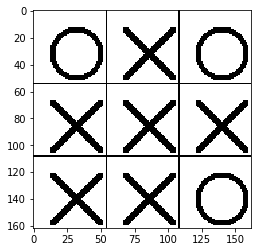

[('x', (0, 0)), ('o', (0, 1)), ('x', (0, 2)), ('x', (1, 0)), ('o', (1, 1)), ('x', (1, 2)), ('o', (2, 0)), ('x', (2, 1)), ('x', (2, 2))]


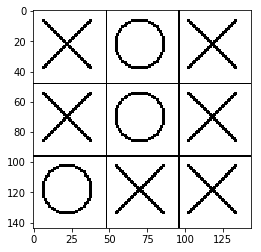

[('o', (0, 0)), ('x', (0, 1)), ('x', (0, 2)), ('o', (1, 0)), ('x', (1, 1)), ('x', (1, 2)), ('x', (2, 0)), ('o', (2, 1)), ('x', (2, 2))]


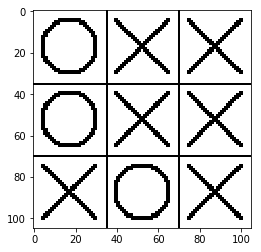

In [10]:
for img, text in zip(imgs, chars):
    plt.imshow(img, cmap=plt.cm.gray)
    print(text)
    plt.show()